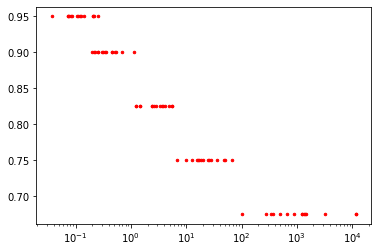

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Nf_data = [[0.257,0.105,0.217,0.085,0.206,0.083,0.203,0.076,0.143,0.074,0.123,0.072,0.120,0.037,0.109]
,[1.129,0.311 ,0.680,0.295 ,0.540,0.257 ,0.509,0.252 ,0.457,0.226 ,0.451,0.216 ,0.356,0.201 ,0.342]
,[5.598,2.590 ,5.560,2.410 ,4.820,2.400 ,4.110,1.492 ,3.847,1.460 ,3.590,1.258 ,3.330,1.246 ,2.903]
,[67.340,18.620 ,50.090,17.280 ,48.420,16.190 ,36.350,15.580 ,27.940,12.600 ,26.260,9.930 ,24.900,6.710 ,20.300]
,[11748,896 ,11748,659 ,3295,486 ,1459,367 ,1400,340 ,1330,280 ,1250,103 ,1242]]

stress_data = [0.95,0.90,0.825,0.75,0.675]
Nf = np.array(Nf_data)
Nf = np.resize(Nf,(75,))
    
stress = []
for i in stress_data:
    stress.append(i*np.ones(15))
stress = np.resize(np.array(stress),(75,))

plt.xscale('log')
plt.plot(Nf,stress,'r.',markersize=5)

In [5]:
Nf=np.array(Nf_data).reshape(75,1)

initial estimation of parameters : -57.41744162222471 142.27033790774055 -2.6270771193389577


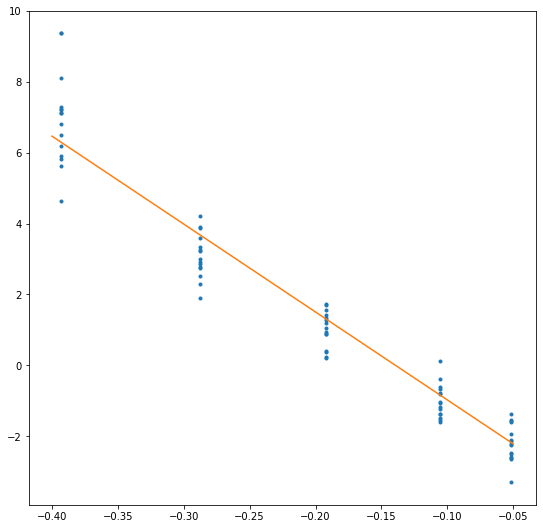

In [6]:
Nf_logged=np.log(Nf)
stress_logged=np.log(stress)

plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
# ploting the distribution
plt.plot(stress_logged,Nf_logged,'.')

# determine the initial estimation
def initial_est(Nf_logged,stress_logged):
    x1 = np.mean(stress_logged[0:15])
    x2 = np.mean(stress_logged[15:30])
    x3 = np.mean(stress_logged[30:45])
    y1 = np.mean(Nf_logged[0:15])
    y2 = np.mean(Nf_logged[15:30])
    y3 = np.mean(Nf_logged[30:45])
    
    c = (x2*(x3-x1)*(y1-y2) - x3*(x2-x1)*(y1-y3)) / ((x3-x1)*(y1-y2)-(x2-x1)*(y1-y3))
    b = ((y1-y2)*(x2-c)*(x1-c))/(x2-x1)
    a = y1 - (b/(x1-c))
    return a,b,c

int_a,int_b,int_c = initial_est(Nf_logged,stress_logged)

# plot intial estimation
int_points = np.array([-0.4,-0.05]) # start and end points based on graph of experimental values
int_val = int_a + (int_b/(int_points - int_c)) # values corresponind to that points based on initial parameters
       
plt.plot(int_points,int_val,label="initial estimation")
                       
print('initial estimation of parameters :',int_a,int_b,int_c)

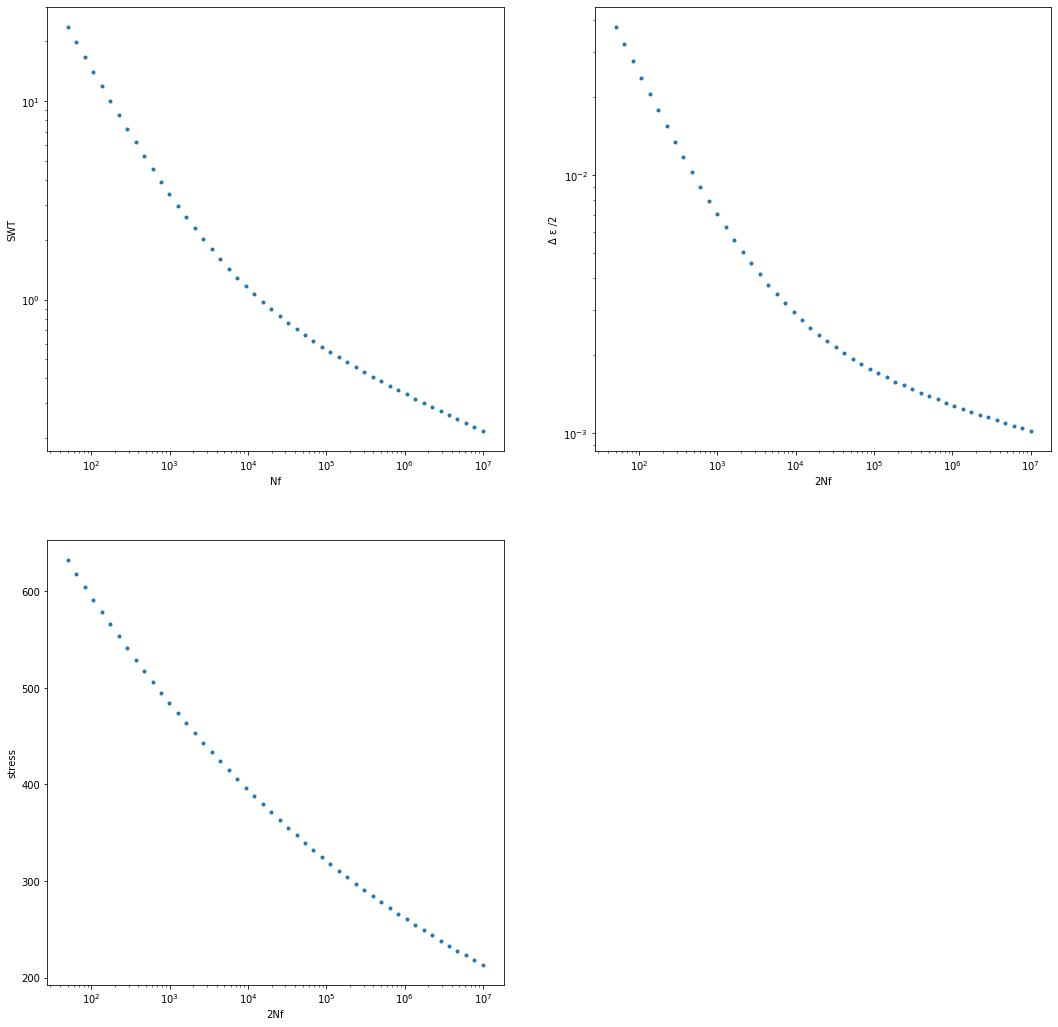

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(
        Nf=np.linspace(10,10000000,10000),
        E = 211600,
        sigma_dash = 952.20,
        b = -0.0890,
        epsilon_dash = 0.7371,
        c = -0.6640
    ):
    '''
        generate_data(Nf,E,sigma_dash,b,epsilon_dash,c)->
            SWT,strain,stress,Nf (default for S355)
    '''
    
    strain =  (sigma_dash/E)*((2*Nf)**b) + epsilon_dash*((2*Nf)**c)
    stress = sigma_dash*((2*Nf)**b)
    SWT = strain*stress
    return SWT,strain,stress,Nf

Nf = 10**np.linspace(1.7,7,50)

SWT,strain,stress,Nf = generate_data(Nf)


plt.figure(figsize=(18,18))

plt.subplot(2,2,1)

plt.ylabel('SWT')
plt.xlabel('Nf')
plt.xscale('log')
plt.yscale('log')

plt.plot(Nf,SWT,'.')

plt.subplot(2,2,2)

plt.ylabel('\u0394 \u03B5 /2')
plt.xlabel('2Nf')
plt.xscale('log')
plt.yscale('log')
plt.plot(Nf,strain,'.')

plt.subplot(2,2,3)

plt.ylabel('stress')
plt.xlabel('2Nf')
plt.xscale('log')
plt.plot(Nf,stress,'.')
